### 머신러닝
- 데이터를 기반으로 학습
- 과거 컴퓨터로 데이터 입력, 학습 패턴을 찾는 패턴 인식

#### 식에 필요한 요소
- 무언가(x)로 무엇(y)를 예측하고 싶다 

    $$ f(x) = y $$

    - x : 독립변수 (입력변수) , 데이터 문제 
    - y : 종속변수 (출력변수) , 정답 
    - f : 머신러닝 모형(모델)

- 우리는 이떄까지 f를 직접 코딩. 즉 x값들을 입력하면 y가 나오도록 개발 
- 머신러닝, 딥러닝 x와 y를 다 입력 및 훈련하여 함수 f를 컴퓨터가 만들도록 하는 것

#### 데이터셋 분리 
- 훈련을 시켜서 독립변수에 대한 종속변수가 도출되는 모델 만들 수 있음 
- 100% 훈련에 사용하면 검증을 할 데이터 없음
- Train 데이터로 훈련 후, Test 데이터로 실험 
- 또는 Train 데이터로 훈련, Vaild 데이터 검증 후 Test데이터 실험 

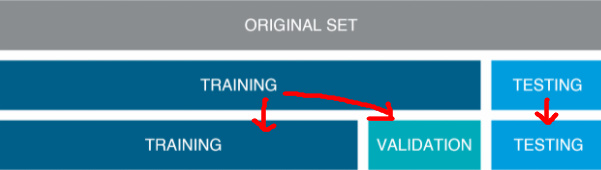

- 100%에서 Train과 Test 나눌때 7:3 또는 8:2로 비율을 나눔

#### 사이킷런을 사용하여 타이타닉 생존자 예측 

- 선형회귀 : 선형회귀에 대한 정의는 결론을 본 뒤 설명😊

```shell
%pip install Scikit-learn
```

In [6]:
%pip install Scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 10.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/11.0 MB 6.3 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.0 MB 7.7 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.0 MB 8.7 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.7 MB ? eta -:--:--
   -- ------------------------------------- 2.4/44.7 MB 11.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/44.7 MB 11.5 MB/s eta 0:00:04
   ----- ---------------------------------- 5.8/44.7 MB 9.3 MB/s eta 0:00:05
   ------- -------------------------------- 7.9/44.7 MB 9.4 MB/s eta 0:00:04
   -------- ------------------------------- 10.0/44.7 MB 9.7 MB/s eta 0:00:04
   -----

In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
# 분석 시각화 라이브러리 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, rc, font_manager
import warnings
import seaborn as sns
import time
from tqdm import tqdm  # 반복 진행 프로그레스바 모듈

In [42]:
# 맷플롯립 기타설정
warnings.simplefilter('ignore') # 경고메시지 출력숨김

## 맷플롯립 설정
plt.rcParams['font.size'] = 12 # 글자크기
plt.rcParams['figure.figsize'] = (12, 6) # (W, H)
plt.rcParams['axes.grid'] = True # 차트 가로세로줄 표시

## 시본 설정
sns.set_theme(style='darkgrid', color_codes=True)

In [43]:
# seaborn 팔레트 설정용 함수 
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

https://github.com/datasciencedojo/datasets/blob/master/titanic.csv : 통합데이터 다운로드(titanic.csv)

In [9]:
# 사이킷런 임포트 
from sklearn import preprocessing

##### 데이터 로드 

In [11]:
# 타이타닉 훈련데이터

df_train = pd.read_csv('./data/train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##### 데이터컬럼 정의 
1. PassengerId : 탑승자 데이터 일련번호 
2. Survived : 생존여부, 0은 사망 1은 생존 
3. Pclass : 선실 등급, 1 - 1등급석 2- 2등석석 3-3등석실
4. Name : 탑승자 명 
5. Sex : 성별
6. Age : 나이
7. SibSp : sibling(형제), spouse(배우자)동반 형제와 배우자 수 
8. Parch : Parent, child 동반한 부모 또는 자녀 인원수 
9. Ticket : 티켓번호 
10. Fare : 티켓요금
11. Cabin : 선실번호 
12. Embarked : 탑승한 항구 코드 

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 데이터 
    - 총 891개, 12개 컬럼, float64(2), int64(5), object(5)

- 결측치 (NULL 값)
    - Age 177개
    - Cabin 687개
    - Embarked 2개

#### 데이터 전처리 
- Age의 결측치 : 나이의 빈 값은 평균치 입력 
- Cabin의 결측치 : 재검토 (2등석,3등석에 결측치 분포)
    - 사실 cabin은 그닷 중요도가 떨어져보임(pclass와 연관)
- Embarked의 결측치 : 탑승항구가 3곳, 사람들이 많이 탄 곳에서 탔을거다라고 예측 

In [18]:
# 나이 평균, round로 반올림 
round(df_train['Age'].mean()) 

30

In [27]:
# 평균값으로 빈 값 채우기 
df_train['Age'].fillna(round(df_train['Age'].mean()), inplace=True)

아 다 날라갔어진쫭자아아ㅏ아가아가가

In [29]:
## Cabin 결측치는 컬럼 삭제 , inplace 교체 여부
# axis - 0행 삭제, 1열 삭제 

df_train.drop(['Cabin'], axis=1, inplace=True)

In [30]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


#### 차트 시각화 


In [32]:
## 성별, 생존자 수 파악
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survival Rate')

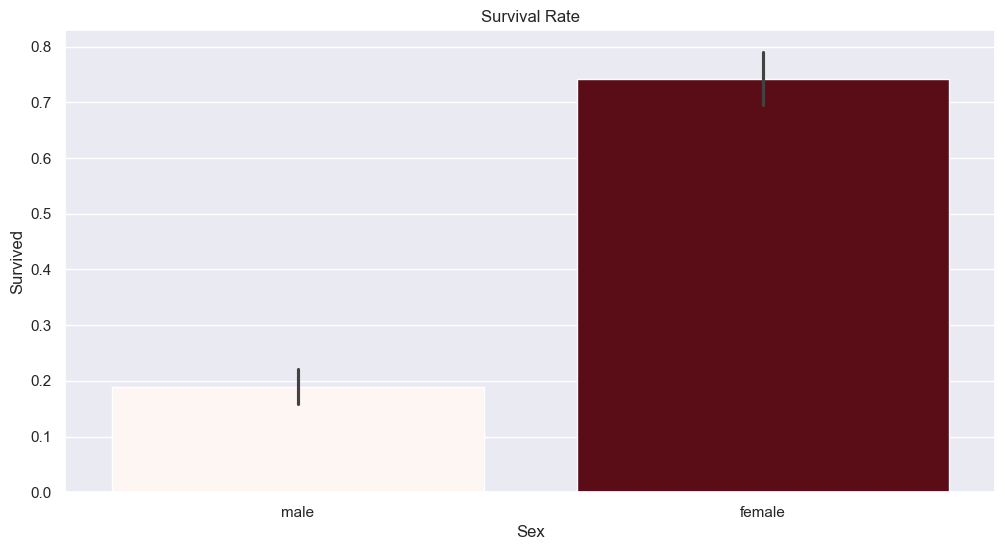

In [45]:
# seaborn으로 시각화 
sns.barplot(data=df_train, x='Sex', y='Survived', palette=colors_from_values(df_train['Survived'], 'Reds'))
plt.title('Survival Rate')


<Axes: xlabel='Pclass', ylabel='Survived'>

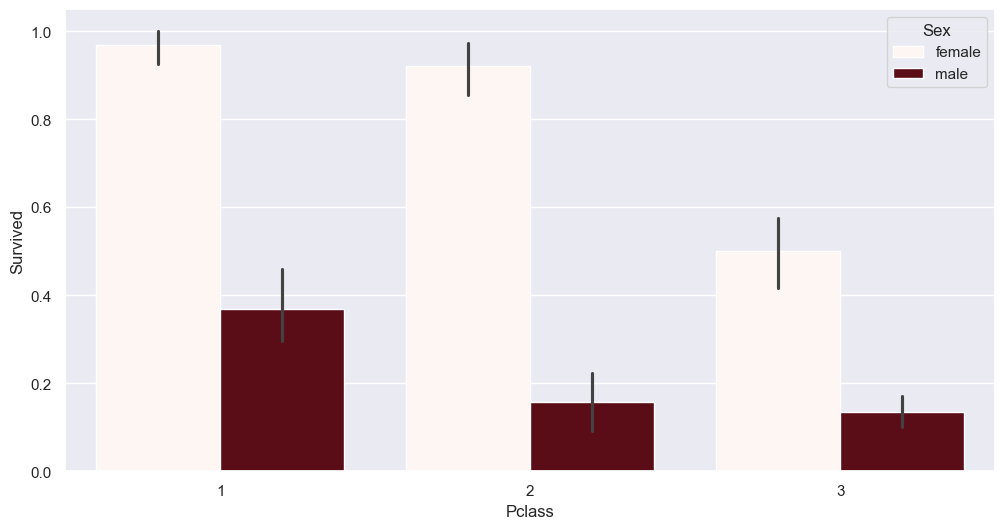

In [47]:
sns.barplot(data=df_train, x='Pclass', y='Survived', hue='Sex',palette=colors_from_values(df_train['Survived'], 'Reds'))

In [59]:
## 나이대로 통계 
def get_ageGroup(age):
    cate = ''
    #if age <= -1:cate = 'unknown'
    if age <= 5:cate = 'Baby'
    elif age <= 12:cate = 'Child'
    elif age <= 18:cate = 'Teenager'
    elif age <= 25:cate = 'Student'
    elif age <= 35:cate = 'Young'
    elif age <= 60:cate = 'Adult'
    else : cate = 'Elderly'
    
    return cate 

In [60]:
group_name = ['Baby',  'Child', 'Teenager', 'Student', 'Young' ,'Adult','Elderly']


In [61]:
df_train['AgeGroup'] = df_train['Age'].apply(lambda x :get_ageGroup(x))

In [55]:
df_train.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,Young
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.45,S,Young
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,Young
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,Young


<Axes: xlabel='AgeGroup', ylabel='Survived'>

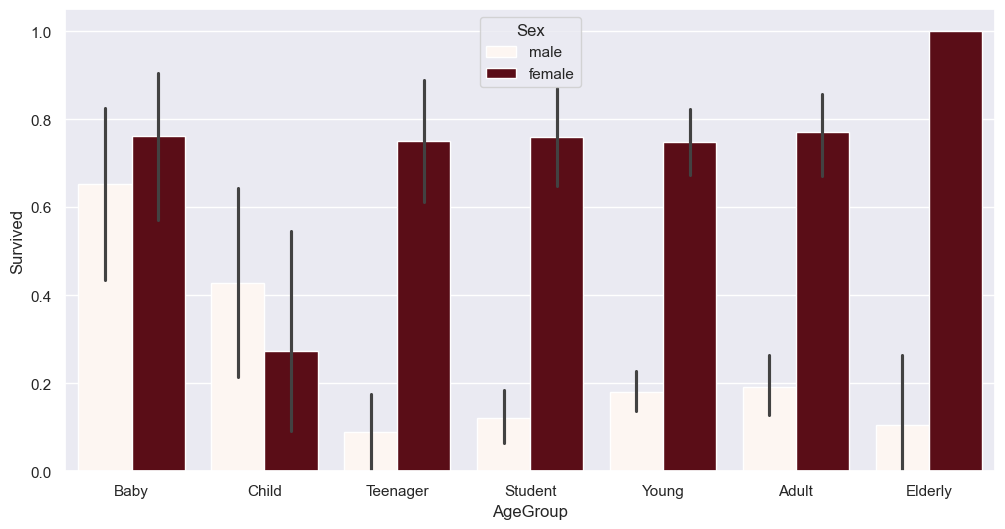

In [62]:
## 연령대로 바차트 
sns.barplot(data=df_train, x='AgeGroup', y='Survived', hue='Sex', palette=colors_from_values(df_train['Survived'],'Reds'), order=group_name)